## Introduction

One can view number and play with numbers if they are statisticians to get some valuable insights from the raw data, but in real world do we know whether our stakeholders are that much into statisitcs? Majorly anwer will be straight **"no"**, to give your series of knowledge and insights a **story telling** nature we need to provide it in the form of **Data Visualization** hence converting your numeric data into insightful **graphs/plots/charts**.

In this article, our focus will be primarily on **multi-dimensional** data. I have dedicated my previous article solely on **one dimensional** data that's why focussing on N-D data is more important in enterprise case studies.

## Importing all the necessary packages

Starting with importing the relevant libraries like **numpy** (handling mathematical calculations), **pandas** (DataFrame manipulations), **matplotlib** (The OG visualiation library closest to python interpretor and **"C"** development), last but not the least- **seaborn** (built on top of matplotlib it give way more options and better look and feel comparitively).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

To explore higher dimensional data and the relationships between data attributes, we'll load in the file **Diabetes.csv**. It's from [from Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). 

In [2]:
df_original = pd.read_csv("Diabetes.csv")
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Inference:** We will be using two dataset for this article, one will be **diabetes patients** dataset and other one is the **height and weight** of the persons. In above output we can see the glimpse of first dataset using **head()** method.

In [3]:
cols = [c for c in df_original.columns if c not in ["Pregnancies", "Outcome"]]
df = df_original.copy()
df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


**Inference:** Removing the **missing or junk** values from the dataset is always the priority step. Here we are first replacing the **0** value to **NaN** as we had 0 as the bad data in our **features** column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


**Inference:** Now we can see that in some of the columns there are few Null values like, **Skin thickness, Insulin, BMI**, etc.

## Actually viewing the data

So, surprisingly noone, its actually useful to view the data. Straight up by using head we can see that this dataset is utilising **0** to represent no value - unless some poor unfortunate soul actually has a skin thickness of 0. 

If we want to do more than expect the data, we can use the **describe** function we talked about in the previous section.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Scatter Matrix

Scatter Matrix is one of the best plot to determine the relationship (**linear** mostly) between the **multiple variables** of all the dataset, when you will see the linear graph between two or more variables that indicates the **high correlation** between those features, it can be either **positive** or **negative** correlation.

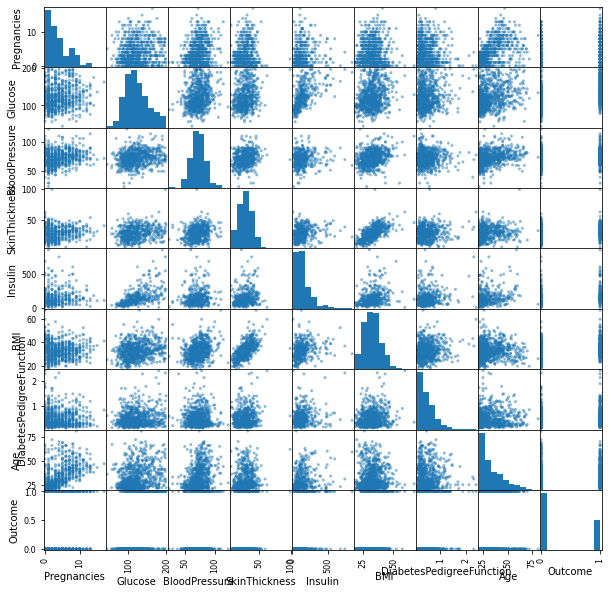

In [6]:
pd.plotting.scatter_matrix(df, figsize=(10, 10));

**Inference:** From the above plot we can say that this plot alone is quite **descriptive** as it is showing us the linear relationship between all the variables in the dataset. For example we can see that the **Skin Thickness** and **BMI** is sharing linear tendency.

**Note:** Due to big names of columns we are facing bit issue while reading the same though that can be improved (out of the scope of article) 

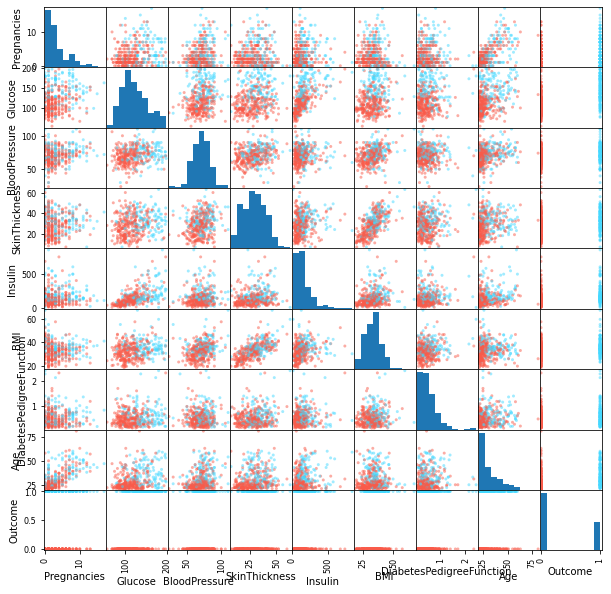

In [7]:
df2 = df.dropna()
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(10,10), color=colors);

**Inference:** The scatter plot gives us both the histograms for the distributions **along the diagonal**, and also a lot of 2D scatter plots **off-diagonal**. Not that this is a symmetric matrix, so I just look at the diagonal and below it normally. We can see that some variables have a lot of scatter and some are correlated (ie there is a direction in their scatter). Which leads us to other type of plot i.e. **correlation plot**.

## Correlation Plots

Before going in deep discussion with correlation plot we first need to understand about the correlation and for that reason we are using the **pandas's corr()** method that will retrun the **Pearson's correlation coefficient** between two data inputs. In a nuthsell, these plots are to easily quantify which variables or attributes are correlated with each other.

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


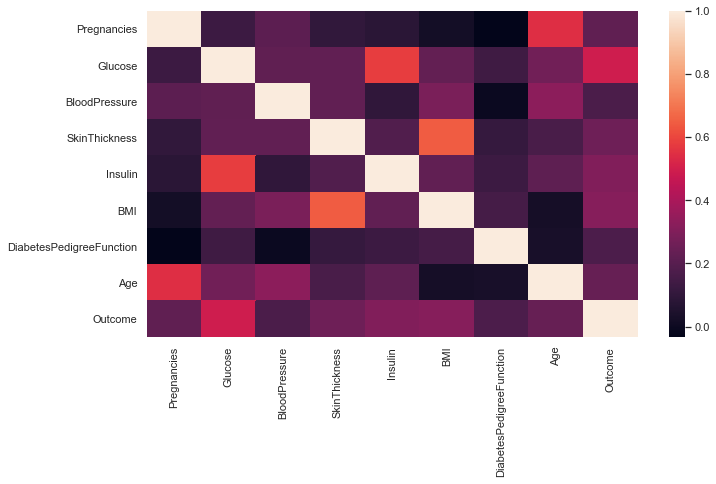

In [15]:
sb.set(rc={'figure.figsize':(11,6)})
sb.heatmap(df.corr());

**Inference:** In seaborn or matplotlib supported correlation plot we can compare the higher and lower correaltion between the variables using it's **color pallete** and **scale**. In the above graph the **lighter is the color** the **more is the correlation** and vice versa. There are some drawbacks in this plot which we will get rid of in the very next graph.

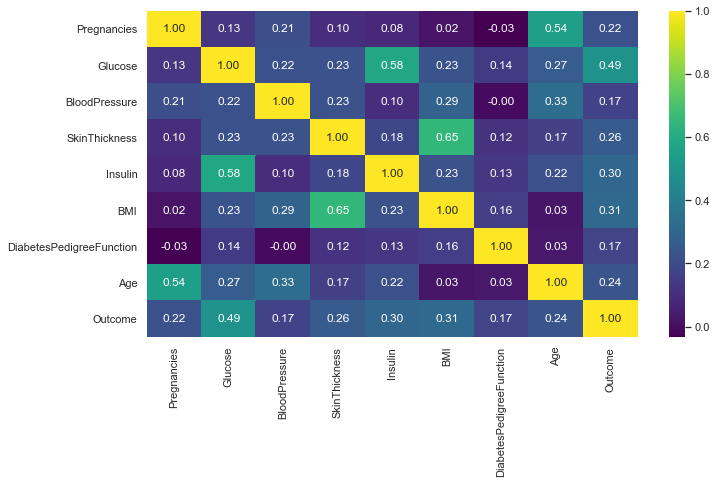

In [16]:
sb.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

**Inference:** Now one can see this is a **symmetric matrix** too. But it immedietly allows us to point out the most **correlated** and **anti-correlated attributes**. Some might just be common sense - Pregnancies v Age for example - but some might give us real insight into the data.

Here, we have also used some parameters like **annot= True** so that we can see correlated values and some formatting as well.

## 2D Histograms

**2D Histograms** are mainly used for **image processing** where it shows the **intensities of pixels** at a certain position of the image. Similarly we can use it for other problem statements as well where we need to analyse two or more variables as **two dimensional** or **three dimensional** histograms. 

For the rest of this section, we're going to use a different dataset which has more data in it. 

**Note:** 2-D histograms are very useful when you have a **lot** of data. [See here for the API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

In [17]:
df2 = pd.read_csv("height_weight.csv")
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


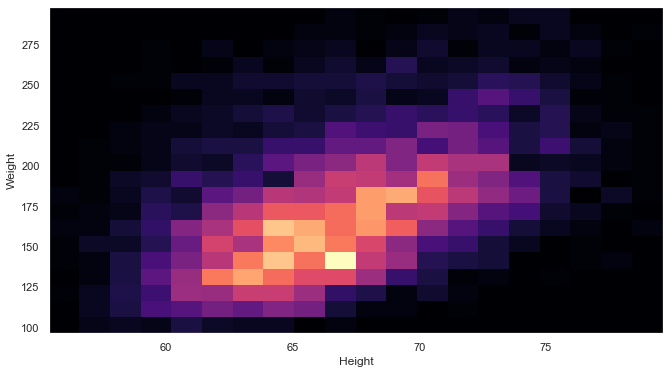

In [18]:
plt.hist2d(df2["height"], df2["weight"], bins=20, cmap="magma")
plt.xlabel("Height")
plt.ylabel("Weight");

**Inference:** We have also worked with one dimensional Histograms but that is for **univariate analysis** now if we want to get the data distribution of more than one feature than we have to shift our focus to **2-D Histograms**. In the above 2-D graph height and weight is plotted against each other, keeping the **cmap** as **magma**.

# Contour plots

Bit hard to get information from the 2D histogram isnt it? Too much noise in the image. What if we try and contour diagram? We'll have to bin the data ourself.

Every alternatives comes into picture when the original one has some drawbacks, Similarly, the case is with **2-D histograms** that it become a bit hard to get the information from itas there is soo much noise in the graph. Hence now, we will go with **contour plot**

Here is the resource that can help you deep dive in this plot. The [contour API is here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html).

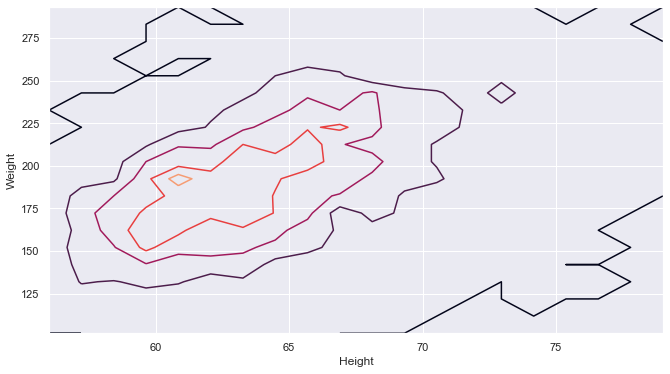

In [19]:
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel("Height")
plt.ylabel("Weight");

**Inference:** Now we can see that this contour plot which is way more far better than complex and noisy 2-D Histogram as it is showing clear distribution between **height and weight** simulataneously. There are still the room of improvement if we will use the **KDE plot from seaborn** then the same contours will be smoothen and more clearly informative.

## Conclusion

From the very beginning of the article we are primarily focussing on data visualization for the multi-dimensional data and in this journey we got through all the important graphs/plots that could derive the business related insights from the numeric data from multiple features all at once. In the last section, we will cover all these graphs in a nuthsell.

1. Firstly we got introduced to **scatter matrix** that show us the relationship of every variable with the other one. Then using seaborn **heat map** is used in order to get the better approach of **multi variable analysis**.

2. Then came the **2-D histograms** where we can go with binary variable analysis i.e. 2 variable can be simultaneously seen and we can get the insights from it.

3. At the last we got to know about **Contour plot** which helped us to get the better version of 2-D histograms as it **removes the noise** from the image and have the more clear interpretation.